In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mticker
import unittest
from pandas.plotting import register_matplotlib_converters

In [3]:
pg=pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ["date"], index_col = "date")

In [4]:
pg.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
pg=pg[(pg['value']>=pg['value'].quantile(0.25))&
       (pg['value']<=pg['value'].quantile(0.95))]

Text(0, 0.5, 'Page views')

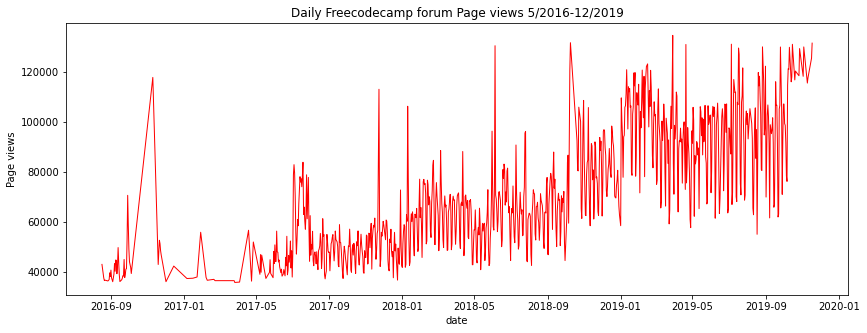

In [6]:
fig, ax = plt.subplots(figsize = (14,5))
ax.plot(pg.index,pg["value"], 'r', linewidth = 1 )

ax.set_title("Daily Freecodecamp forum Page views 5/2016-12/2019")
ax.set_xlabel("date")
ax.set_ylabel("Page views")

In [7]:
pg['Month']=pg.index.month

In [8]:
pg['Year']= pg.index.year

In [9]:
pg.head()

,value,Month,Year
date,,,
2016-08-17,43003,8,2016
2016-08-20,37583,8,2016
2016-08-21,36559,8,2016
2016-08-22,36701,8,2016
2016-08-27,36366,8,2016


In [10]:
pg_bar = pg.groupby(["Year", "Month"])["value"].mean()

In [11]:
pg_bar

Year  Month
2016  8         38114.875000
      9         42870.576923
      10        43591.750000
      11        57282.625000
      12        39204.000000
2017  1         42163.000000
      2         36988.750000
      3         36130.000000
      4         45218.250000
      5         41996.000000
      6         44613.000000
      7         65806.838710
      8         47712.451613
      9         48503.142857
      10        47438.709677
      11        54975.965517
      12        49898.178571
2018  1         58580.096774
      2         67005.185185
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10        88384.000000
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        104901.555556
      3         91214.483871
      4         89368.433333
      5         91439.903226
  

In [12]:
pg_bar = pg_bar.unstack()

In [13]:
pg_bar

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38114.875000,42870.576923,43591.750000,57282.625000,39204.000000
2017,42163.000000,36988.750000,36130.000000,45218.250000,41996.000000,44613.000000,65806.838710,47712.451613,48503.142857,47438.709677,54975.965517,49898.178571
2018,58580.096774,67005.185185,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,88384.000000,78688.333333,80047.483871
2019,102056.516129,104901.555556,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,97710.461538,92747.714286,111169.705882,123182.833333,NaN


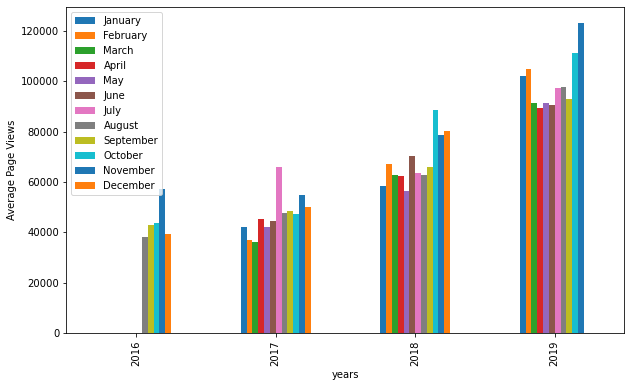

In [14]:
pg_bar.plot.bar(legend=True,ylabel="Average Page Views", xlabel ="years", figsize=(10,6)).figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])



In [15]:
pg_box = pg.copy()


In [16]:
pg_box

,value,Month,Year
date,,,
2016-08-17,43003,8,2016
2016-08-20,37583,8,2016
2016-08-21,36559,8,2016
2016-08-22,36701,8,2016
2016-08-27,36366,8,2016
...,...,...,...
2019-11-03,130118,11,2019
2019-11-09,115642,11,2019
2019-11-10,117717,11,2019


In [17]:
pg_box.reset_index(inplace=True)


In [18]:
pg_box

,date,value,Month,Year
0,2016-08-17,43003,8,2016
1,2016-08-20,37583,8,2016
2,2016-08-21,36559,8,2016
3,2016-08-22,36701,8,2016
4,2016-08-27,36366,8,2016
...,...,...,...,...
907,2019-11-03,130118,11,2019
908,2019-11-09,115642,11,2019
909,2019-11-10,117717,11,2019
910,2019-11-16,125634,11,2019


In [19]:
pg_box['year'] = [d.year for d in pg_box.date]


In [20]:
pg_box

,date,value,Month,Year,year
0,2016-08-17,43003,8,2016,2016
1,2016-08-20,37583,8,2016,2016
2,2016-08-21,36559,8,2016,2016
3,2016-08-22,36701,8,2016,2016
4,2016-08-27,36366,8,2016,2016
...,...,...,...,...,...
907,2019-11-03,130118,11,2019,2019
908,2019-11-09,115642,11,2019,2019
909,2019-11-10,117717,11,2019,2019
910,2019-11-16,125634,11,2019,2019


In [21]:
pg_box['month'] = [d.strftime('%b') for d in pg_box.date]

In [22]:
pg_box

,date,value,Month,Year,year,month
0,2016-08-17,43003,8,2016,2016,Aug
1,2016-08-20,37583,8,2016,2016,Aug
2,2016-08-21,36559,8,2016,2016,Aug
3,2016-08-22,36701,8,2016,2016,Aug
4,2016-08-27,36366,8,2016,2016,Aug
...,...,...,...,...,...,...
907,2019-11-03,130118,11,2019,2019,Nov
908,2019-11-09,115642,11,2019,2019,Nov
909,2019-11-10,117717,11,2019,2019,Nov
910,2019-11-16,125634,11,2019,2019,Nov


In [23]:
pg_box['month_num']=pg_box['date'].dt.month
pg_box=pg_box.sort_values('month_num')

In [24]:
pg_box

,date,value,Month,Year,year,month,month_num
627,2019-01-01,58508,1,2019,2019,Jan,1
287,2018-01-11,77030,1,2018,2018,Jan,1
286,2018-01-10,106349,1,2018,2018,Jan,1
285,2018-01-09,60260,1,2018,2018,Jan,1
284,2018-01-08,62887,1,2018,2018,Jan,1
...,...,...,...,...,...,...,...
625,2018-12-30,62826,12,2018,2018,Dec,12
626,2018-12-31,60481,12,2018,2018,Dec,12
252,2017-12-06,60358,12,2017,2017,Dec,12
619,2018-12-24,69618,12,2018,2018,Dec,12


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

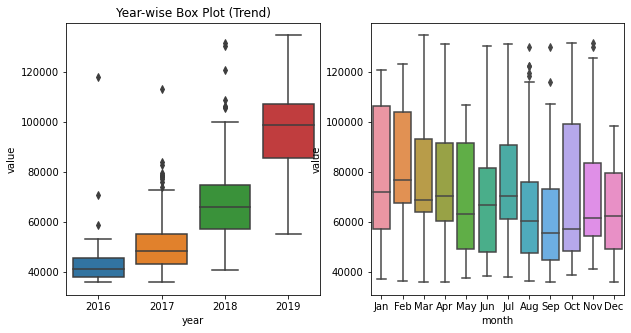

In [44]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0]=sns.boxplot(ax=axes[0], x=pg_box["year"], y=pg_box["value"])
axes[1]=sns.boxplot(ax=axes[1], x=pg_box["month"], y=pg_box["value"])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].xlabel("Year")
axes[0].ylabel("Page Views")

axes[1].set_title("Monthly-wise Box Plot (Seasonality)")
axes[2].xlabel("Month")
axes[3].ylabel("Page Views")